<a href="https://colab.research.google.com/github/desstaw/DataPrivacy_SimulatedAnnealing/blob/main/Main_K_Anonymity_Simulated_Annealing_Utility_GOSSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Import the data and briefly explore it again

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import random
import math

In [ ]:
url = "/content/drive/MyDrive/Colab Notebooks/GOSSIS/gen_gossis.csv"
df = pd.read_csv(url)

In [ ]:
column_names = df.columns.tolist()
print(column_names)

['age', 'L3_bmi', 'd1_pao2fio2ratio_avg', 'd1_arterial_pco2_avg', 'd1_arterial_ph_avg', 'd1_arterial_po2_avg', 'd1_inr_avg', 'd1_lactate_avg', 'd1_albumin_avg', 'd1_bilirubin_avg', 'elective_surgery', 'L4_ethnicity', 'gender', 'L3_height', 'hospital_admit_source', 'hospital_death', 'L3_hospital_los_days', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_m

['age', 'L3_bmi', 'd1_pao2fio2ratio_avg', 'd1_arterial_pco2_avg', 'd1_arterial_ph_avg', 'd1_arterial_po2_avg', 'd1_inr_avg', 'd1_lactate_avg', 'd1_albumin_avg', 'd1_bilirubin_avg', 'elective_surgery', 'L4_ethnicity', 'gender', 'L3_height', 'hospital_admit_source', 'hospital_death', 'L3_hospital_los_days', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max', 'd1_hematocrit_min', 'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'd1_wbc_avg', 'd1_diasbp_diff', 'd1_heartrate_diff', 'd1_mbp_diff', 'd1_resprate_diff', 'd1_heartrate_avg', 'd1_glucose_avg', 'dcs_group', 'd1_bun_avg', 'dx_class', 'dx_sub', 'icu_los_days', 'L2_group', 'L1_age', 'L2_age', 'L3_age', 'L4_age', 'L5_age', 'L6_age', 'L1_hospital_los_days', 'L2_hospital_los_days', 'L1_bmi', 'L2_bmi', 'L1_ethnicity', 'L2_ethnicity', 'L3_ethnicity', 'L1_group', 'L1_height', 'L2_height']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Columns: 103 entries, age to L2_height
dtypes: float64(71), int64(6), object(26)
memory usage: 15.7+ MB


## Necessary pre-processing for CatBoost

In [ ]:
df = df.rename(columns={'age': 'L7_age'})


df ['L1_age'] = df ['L1_age'].astype(str)
df ['L2_age'] = df ['L2_age'].astype(str)
df ['L3_age'] = df ['L3_age'].astype(str)
df ['L3_age'] = df ['L3_age'].astype(str)
df ['L4_age'] = df ['L4_age'].astype(str)
df ['L5_age'] = df ['L5_age'].astype(str)
df ['L6_age'] = df ['L6_age'].astype(str)
#df ['L7_age'] = df ['L7_age'].astype(str)


df ['L1_hospital_los_days'] = df ['L1_hospital_los_days'].astype(str)
df ['L2_hospital_los_days'] = df ['L2_hospital_los_days'].astype(str)
#df ['L3_hospital_los_days'] = df ['L3_hospital_los_days'].astype(str)


df ['L1_height'] = df ['L1_height'].astype(str)
df ['L2_height'] = df ['L2_height'].astype(str)
#df ['L3_height'] = df ['L3_height'].astype(str)

df ['L1_bmi'] = df ['L1_bmi'].astype(str)
df ['L2_bmi'] = df ['L2_bmi'].astype(str)
#df ['L3_bmi'] = df ['L3_bmi'].astype(str)

df ['L1_group'] = df ['L1_group'].astype(str)
df ['L3_group'] = df ['L2_group'].astype(str)


df ['L1_ethnicity'] = df ['L1_ethnicity'].astype(str)
df ['L2_ethnicity'] = df ['L2_ethnicity'].astype(str)
df ['L3_ethnicity'] = df ['L3_ethnicity'].astype(str)
df ['L4_ethnicity'] = df ['L4_ethnicity'].astype(str)

Visual distribution of categorical attributes

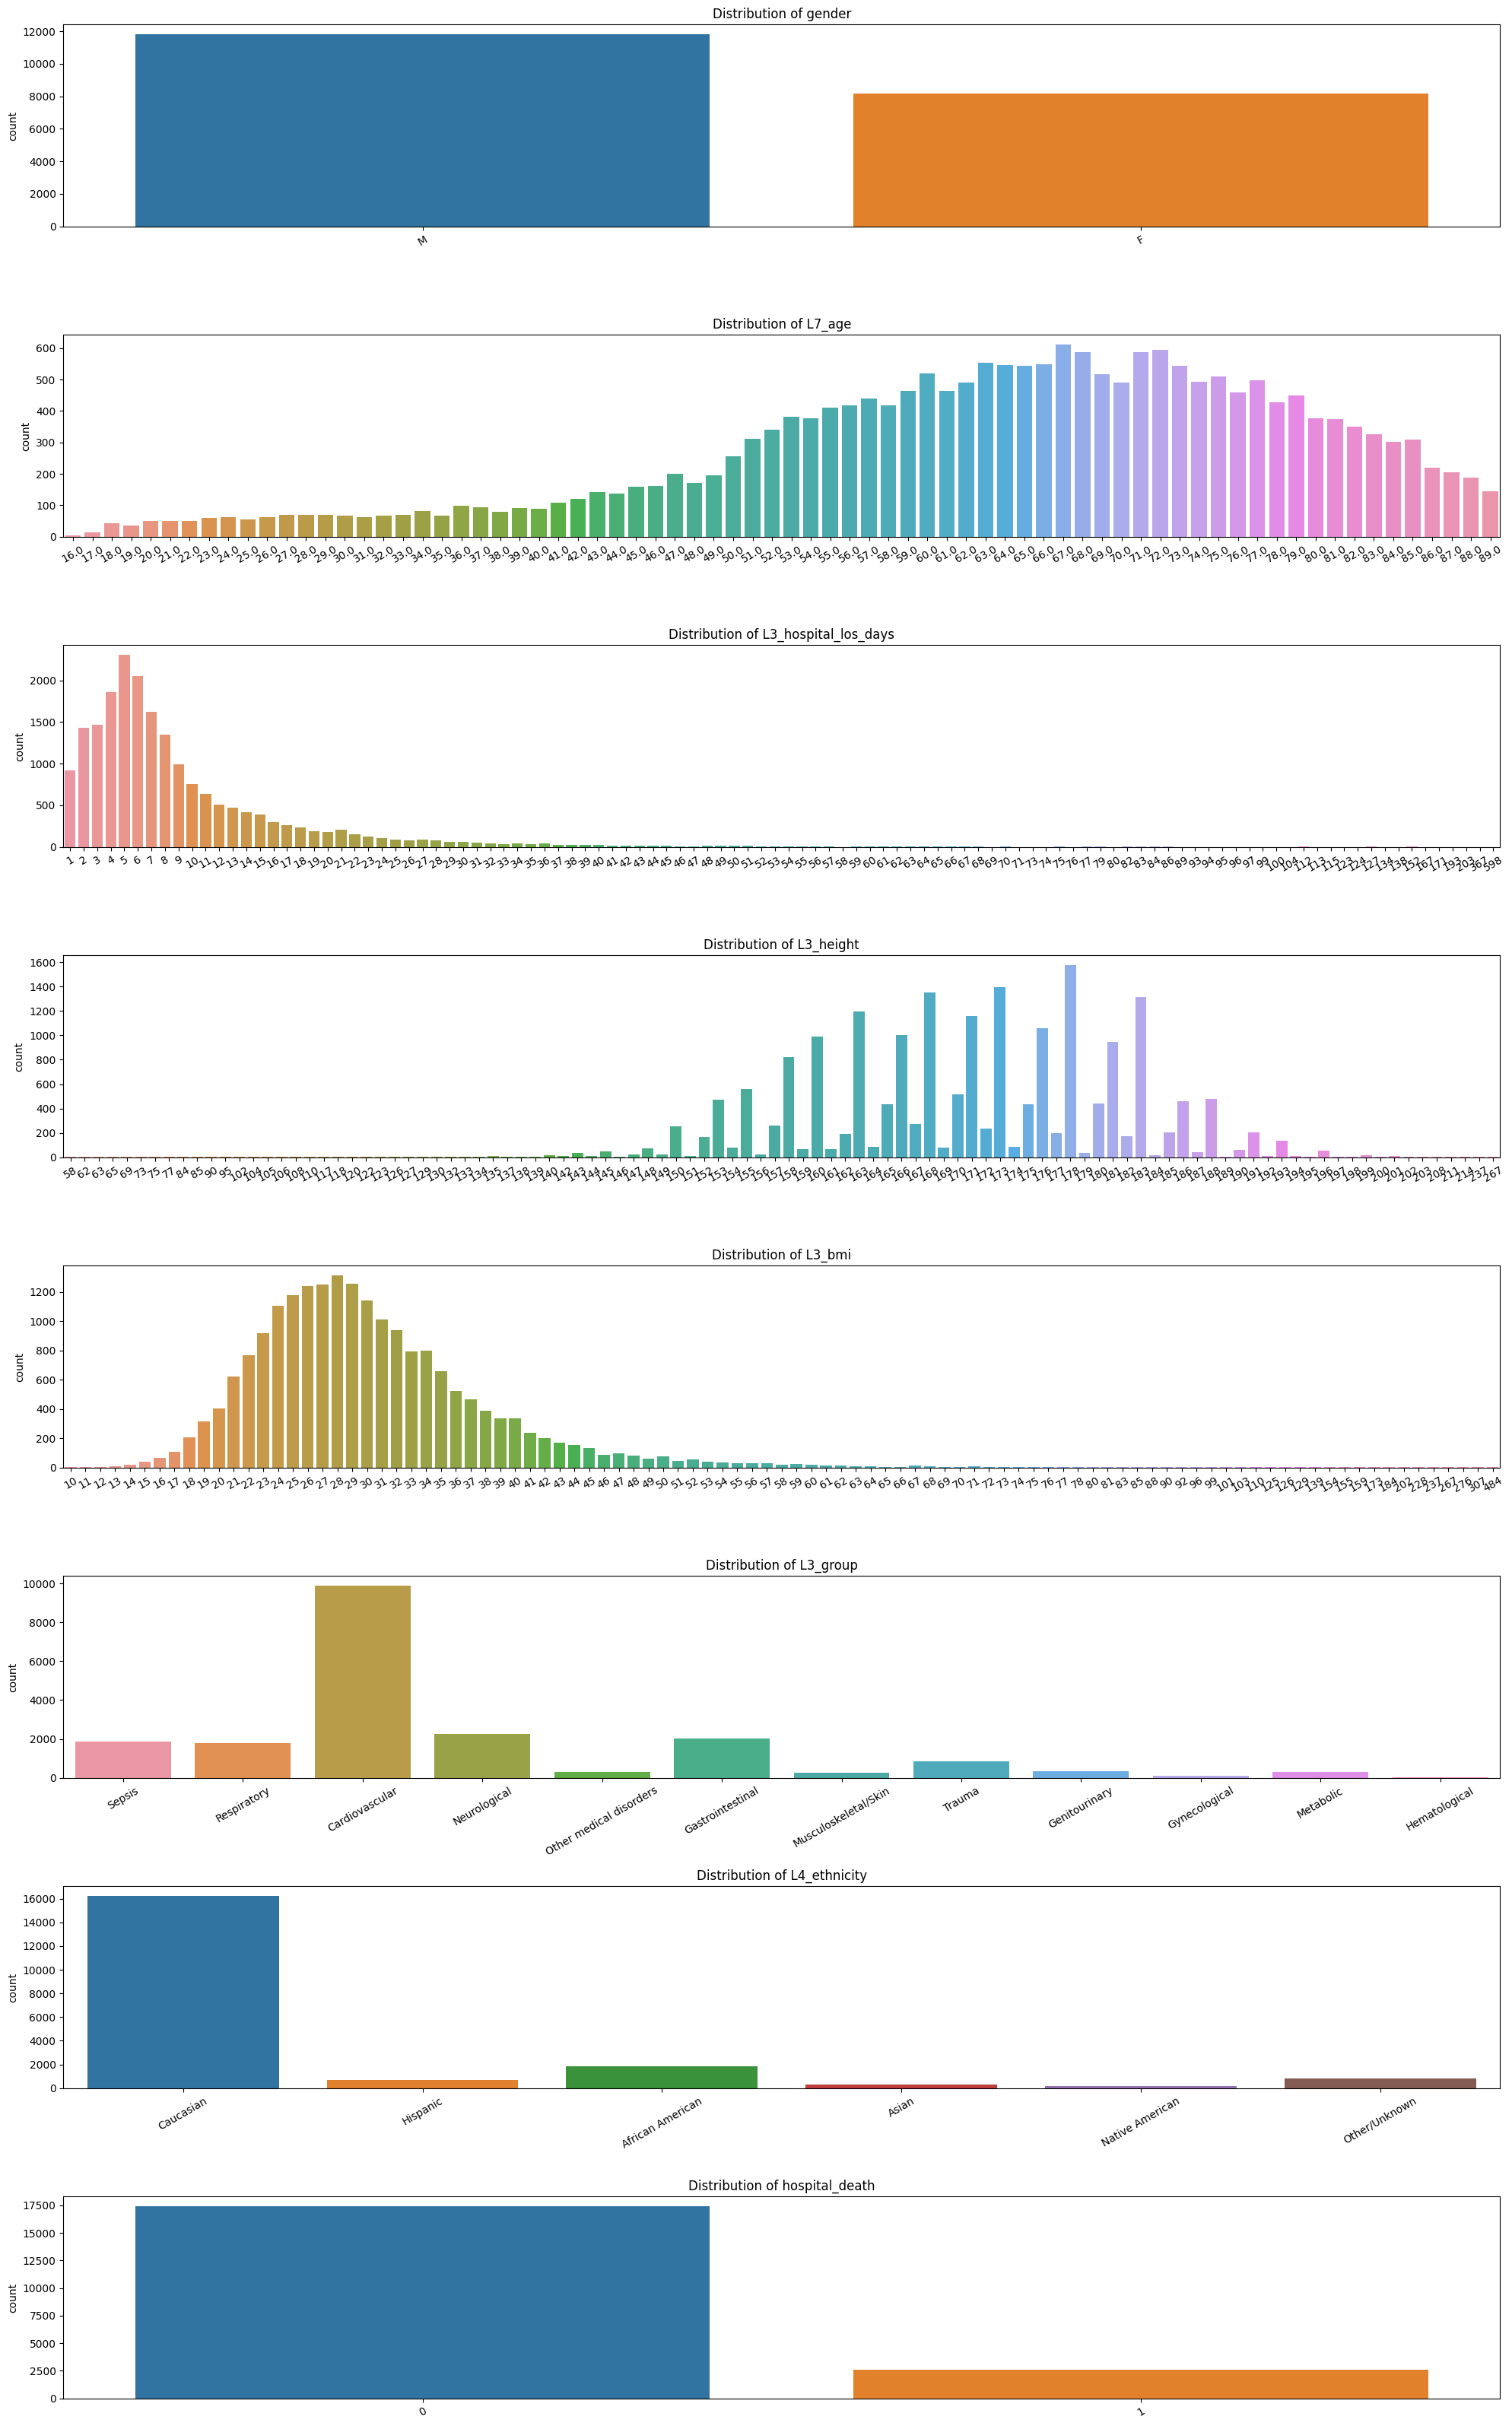

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of categorical columns to visualize
cat_cols = ['gender', 'L7_age', 'L3_hospital_los_days', 'L3_height', 'L3_bmi', 'L3_group', 'L4_ethnicity', 'hospital_death']
#cat_cols = df.select_dtypes(include=['object']).columns

# Determine the number of subplots based on the number of categorical columns
num_subplots = len(cat_cols)

# Set up the subplots
fig, axes = plt.subplots(num_subplots, 1, figsize=(20, 4 * num_subplots))

# Loop through each categorical column and create a countplot in the corresponding subplot
for i, column in enumerate(cat_cols):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)  # Rotate x-axis labels for better readability
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(None)  # Remove x-axis label for better layout

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
#Since the catboost model cannot read columns with interval values which are originally intended to be categories in the form of interval strings
def generate_interval_mappings(df, interval_columns):
    interval_mapping = {}

    for column in interval_columns:
        unique_intervals = df[column].unique()
        for interval in unique_intervals:
            if isinstance(interval, tuple):  # Check if the interval is a tuple
                mapping_key = f"{column}_{interval[0]}_{interval[1]}"
                interval_mapping[interval] = mapping_key
                print('interval mapping', interval_mapping)

    return interval_mapping

# List of columns with interval values
interval_columns = df[[ 'L1_age', 'L2_age', 'L3_age', 'L4_age', 'L5_age', 'L6_age',
                       'L1_hospital_los_days', 'L2_hospital_los_days',
                        'L1_bmi', 'L2_bmi',
                        'L1_ethnicity', 'L2_ethnicity', 'L3_ethnicity', 'L4_ethnicity',
                        'L1_group', 'L2_group',
                        'L1_height', 'L2_height']]

# Generate interval mappings
interval_mapping = generate_interval_mappings(df, interval_columns)

# Apply the interval mapping to create new categorical columns
for column, mapping in interval_mapping.items():
    df[mapping] = df[column].apply(lambda interval: mapping if interval in interval_mapping else None)

# Drop the original columns with intervals
for column in interval_mapping.keys():
    df.drop(column, axis=1, inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Columns: 104 entries, L7_age to L3_group
dtypes: float64(71), int64(6), object(27)
memory usage: 15.9+ MB


## K-anonymity and Simulated Annealing

### Quasi identiifers are formed as `'key': ['set1', 'set2',...]`. The aim to swap from each corresponding set later and not randomly from the whole columns.

In [ ]:
# Define the QI columns and their possible values
quasi_identifiers = {
    'gender': ['gender'],
    'age': ['L1_age', 'L2_age', 'L3_age', 'L4_age', 'L5_age', 'L6_age', 'L7_age'],
    'ethnicity': [ 'L1_ethnicity', 'L2_ethnicity', 'L3_ethnicity', 'L4_ethnicity'],
    'bmi': ['L1_bmi', 'L2_bmi', 'L3_bmi'],
    'hospital_los_days': [ 'L1_hospital_los_days', 'L2_hospital_los_days', 'L3_hospital_los_days'],
    'group':['L1_group', 'L2_group'],
    'height': ['L1_height', 'L2_height', 'L3_height']
}




# Define the initial solution randomly
initial_solution = [
    random.choice(quasi_identifiers['gender']),
    random.choice(quasi_identifiers['age']),
    random.choice(quasi_identifiers['ethnicity']),
    random.choice(quasi_identifiers['bmi']),
    random.choice(quasi_identifiers['hospital_los_days']),
    random.choice(quasi_identifiers['group']),
    random.choice(quasi_identifiers['height'])

]

print(initial_solution)

['gender', 'L5_age', 'L2_ethnicity', 'L3_bmi', 'L3_hospital_los_days', 'L2_group', 'L2_height']


###Simulated annealing parameters

In [ ]:
# temperature and cooling rate for SA
initial_temperature = 1000.0
cooling_rate = 0.01
min_temperature = 0.001

# number of iterations at each temperature level
num_iterations = 200

# maximum number of iterations without improvement
max_iterations_without_improvement = 8

total_iterations = 30 #300 #2000  # Initialize the total number of iterations

# Calculate the number of temperature levels based on total_iterations and num_iterations
num_temperature_levels = total_iterations // num_iterations

# Use num_temperature_levels to set the range of the temperature loop
current_temperature = initial_temperature

# Tried to implement adaptive cooling schedule but got confused more
'''
while current_temperature > min_temperature:
    total_iterations += num_iterations
    current_temperature *= cooling_rate

print("Max. Number of Iterations:", total_iterations)
'''
# Adjust the current temperature using the cooling rate
for _ in range(num_temperature_levels):
    current_temperature *= cooling_rate

### Classification model

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

def calculate_classification_accuracy(selected_columns, df, k):
    # Prepare the feature matrix (X) and target variable (y)
    X = df[selected_columns]
    y = df['hospital_death']

    # Print the number of rows in X and y
    print('X columns:', X.columns)
    print("Number of rows in X:", len(X))
    print("Number of rows in y:", len(y))

    # Convert categorical features to strings
    categorical_features_indices = X.select_dtypes(include=['object']).columns

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Initialize the CatBoostClassifier
    catboost_model = CatBoostClassifier(iterations=300, depth=7, learning_rate=0.04, loss_function='Logloss', cat_features=list(categorical_features_indices))

    # Train the model on the training data
    catboost_model.fit(X_train, y_train, cat_features=list(categorical_features_indices))

    # Predict on the testing data
    y_pred = catboost_model.predict(X_test)

    # Calculate and return the classification accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Convert labels to binary values (0 and 1)
    #y_test_binary = np.where(y_test == '<=50K', 0, 1)
    #y_pred_binary = np.where(y_pred == '<=50K', 0, 1)

    # Calculate the AUC-ROC score
    auc_roc = roc_auc_score(y_test, y_pred)
    print("AUC-ROC Score:", auc_roc)

    return auc_roc


### Objective Function

In [ ]:
# k-anonymity threshold
k = 10

def objective_function(solution, max_suppressed_fraction):
    # Group the data based on the solution
    grouped = df.groupby(solution)
    total_rows_count = 0
    '''
    for group_name, group_data in grouped:
        #group_sum = group_data.sum()
        #print(f"Group Name: {group_name}")
        #print(f"Sum of Rows in Group:\n{group_sum}")
        group_rows_count = len(group_data)
        total_rows_count += group_rows_count

        # Print the total sum of all rows in all groups (just to test that nothing changed)
    print(f"Total Sum of All Rows in All Groups: {total_rows_count}")
    '''

    #print('Grouped rows', grouped)
    #print('SOLUTION', solution)
    #df_tmp = df
    #df_tmp = df[solution]
    additional_columns = ['hospital_death']
    df_tmp = df[solution + additional_columns]
    # print('DF TMP INFO', df_tmp)

    # Calculate the percentage of suppressed rows -- utility
    total_rows = len(df)
    suppressed_rows = sum(len(group) for group_name, group in grouped if len(group) < k)
    suppressed_fraction = suppressed_rows / total_rows
    print('SUPPRESSION FRACTION', suppressed_fraction)
    #print('Total Suppressed Rows:', suppressed_rows)
    print('Max Suppressed Fraction:', max_suppressed_fraction)



    if suppressed_fraction <= max_suppressed_fraction + 1e-6:
    #if testx < testy :

        # Filter the original dataframe to remove suppressed rows
        filtered_df = df_tmp[~df_tmp.index.isin([idx for group_name, group in grouped if len(group) < k for idx in group.index])]
        #print('FILTERED DF INFO', filtered_df.info())

        # Calculate and return classification accuracy as the objective function score
        classification_accuracy = calculate_classification_accuracy(solution, filtered_df, k)
        print('Classification accuracy (AUC-ROC)', classification_accuracy)
        return classification_accuracy

    else: #suppressed_fraction > max_suppressed_fraction:
        # If the constraint is violated, return a penalty (negative infinity)
        print('SUPPRESSION EXCEEDED LIMIT')
        return -float('inf')



###Neighbourhood solution

In [ ]:

def get_neighbor_solution(solution):
    neighbor_solution = solution.copy()  # Create a copy of the current solution

    # Define the column sets for swapping
    swap_sets = {
        #'sex': ['sex'],
        'age': ['L1_age', 'L2_age', 'L3_age', 'L4_age', 'L5_age', 'L6_age', 'L7_age'],
        'ethnicity': [ 'L1_ethnicity', 'L2_ethnicity', 'L3_ethnicity', 'L4_ethnicity'],
        'bmi': ['L1_bmi', 'L2_bmi', 'L3_bmi'],
        'hospital_los_days': [ 'L1_hospital_los_days', 'L2_hospital_los_days', 'L3_hospital_los_days'],
        'group':['L1_group', 'L2_group'],
        'height': ['L1_height', 'L2_height', 'L3_height']
    }

    # Iterate over each column set and perform swapping if the current column is from that set
    # Randomly select a set to swap columns
    selected_set = random.choice(list(swap_sets.keys()))
    print('selected set:', selected_set)

    # Randomly shuffle the columns within the selected set
    random.shuffle(swap_sets[selected_set])

    # Replace the corresponding columns in the current solution with the shuffled columns
    for idx, col in enumerate(solution):
        if col in swap_sets[selected_set]:
            neighbor_solution[idx] = random.choice(swap_sets[selected_set])
            print('current solution:', solution)
            print('neighbor solution:', neighbor_solution)

    return neighbor_solution

###Simulated Annealing

In [ ]:
import math
import random

def simulated_annealing(initial_solution, initial_temperature, cooling_rate, min_temperature, max_iterations_without_improvement, max_suppressed_fraction):
    current_solution = initial_solution  # Store the current solution
    best_solution = initial_solution  # Initialize the best solution as the current solution
    current_temperature = initial_temperature  # Start with the initial temperature
    iterations_without_improvement = 0  # Initialize counter for iterations without improvement
    iteration = 0  # Initialize the iteration counter


    while current_temperature > min_temperature and iterations_without_improvement < max_iterations_without_improvement:
        improved = False

        for _ in range(num_iterations):
            iteration += 1
            print(f"Iteration {iteration}")

            neighbor_solution = get_neighbor_solution(current_solution)

            current_cost = objective_function(current_solution, max_suppressed_fraction)
            print('current_cost:', current_cost)
            neighbor_cost = objective_function(neighbor_solution, max_suppressed_fraction)
            print('neighbor_cost:', neighbor_cost)


            if neighbor_cost >= current_cost:
                current_solution = neighbor_solution
                #if neighbor_cost < objective_function(best_solution, max_suppressed_fraction):
                if neighbor_cost > objective_function(best_solution, max_suppressed_fraction) and current_cost <= max_suppressed_fraction :
                    best_solution = neighbor_solution
                    print('current best solution:', best_solution)
                    improved = True
            else:
                acceptance_probability = math.exp((current_cost - neighbor_cost) / current_temperature)
                if random.random() < acceptance_probability:
                    current_solution = neighbor_solution
                    improved = True

            print('CURRENT SOLUTION', current_solution)
            if iteration % num_iterations == 0:
                current_temperature *= cooling_rate
                iterations_without_improvement = 0

            if not improved:
                iterations_without_improvement += num_iterations

        current_temperature *= cooling_rate
        iterations_without_improvement += num_iterations

        if improved:
            iterations_without_improvement = 0
        else:
            iterations_without_improvement += num_iterations

    return best_solution


max_suppressed_fraction = 0.30
best_solution = simulated_annealing(initial_solution, initial_temperature, cooling_rate, min_temperature, max_iterations_without_improvement, max_suppressed_fraction)
#max_suppressed_fraction = 0.50  # User-defined maximum suppressed fraction of rows
#auc_roc = objective_function(best_solution, max_suppressed_fraction)  # Calculate the classification accuracy for the best solution



print("Best Solution:", best_solution)
#print("AUC-ROC score:", auc_roc)


Streaming output truncated to the last 5000 lines.
182:	learn: 0.3405969	total: 4.81s	remaining: 3.08s
183:	learn: 0.3405561	total: 4.85s	remaining: 3.06s
184:	learn: 0.3405116	total: 4.9s	remaining: 3.05s
185:	learn: 0.3405116	total: 4.92s	remaining: 3.02s
186:	learn: 0.3404552	total: 4.97s	remaining: 3s
187:	learn: 0.3404552	total: 4.98s	remaining: 2.97s
188:	learn: 0.3404552	total: 5s	remaining: 2.93s
189:	learn: 0.3403210	total: 5.04s	remaining: 2.92s
190:	learn: 0.3403210	total: 5.06s	remaining: 2.89s
191:	learn: 0.3402296	total: 5.11s	remaining: 2.88s
192:	learn: 0.3401839	total: 5.15s	remaining: 2.85s
193:	learn: 0.3401798	total: 5.17s	remaining: 2.82s
194:	learn: 0.3401059	total: 5.21s	remaining: 2.81s
195:	learn: 0.3401049	total: 5.25s	remaining: 2.79s
196:	learn: 0.3401049	total: 5.27s	remaining: 2.76s
197:	learn: 0.3400553	total: 5.32s	remaining: 2.74s
198:	learn: 0.3400216	total: 5.36s	remaining: 2.72s
199:	learn: 0.3400128	total: 5.4s	remaining: 2.7s
200:	learn: 0.3400127	

KeyboardInterrupt: ignored

### Testing the correctness of K anonymity on the best_solution (near-optimal combination of generalized attributes) produced by the SA algorithm

In [ ]:
# Define the privacy parameter
k = 10

#For testing purposes
test_solution = ['gender', 'L2_age', 'L3_ethnicity', 'L2_bmi', 'L2_hospital_los_days', 'L2_group', 'L2_height']

#test_solution = best_solution

df_k = df

# Group the dataset by the quasi-identifiers and suppress the groups with less than k rows
grouped = df_k.groupby(test_solution)
suppressed_indices = []
for group_name, group in grouped:
    if len(group) < k:
        suppressed_indices.extend(group.index)
df_k = df_k.drop(suppressed_indices)
df_k.info()
# Restore the original index
df_index = df_k.index
df_k = df_k.reset_index(drop=True)

counter = 0
for index in suppressed_indices:
    counter = counter + 1
    #print(df_k.loc[index])
    #print("------------")
print('sum of supressed records:', counter)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14052 entries, 0 to 19995
Columns: 104 entries, L7_age to L3_group
dtypes: float64(71), int64(6), object(27)
memory usage: 11.3+ MB
sum of supressed records: 5944


### Run the classification model again but with the optimal parameters 500 iterations , depth = 7 and learning rate = 0.04 to find the best classification accuracy the attribute set can achieve. Those optimal parameters were found through grid search in the other colab notebook (Generalizing GOSSIS).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report

#selected_columns = best_solution

df_k = df
#org

additional_columns = [ 'd1_pao2fio2ratio_avg', 'd1_arterial_pco2_avg', 'd1_arterial_ph_avg', 'd1_arterial_po2_avg', 'd1_inr_avg', 'd1_lactate_avg', 'd1_albumin_avg',
                      'd1_bilirubin_avg', 'elective_surgery', 'hospital_admit_source',
                       'icu_admit_source', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
                       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max',
                       'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
                       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max',
                       'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_hemaglobin_max',
                       'd1_hemaglobin_min', 'd1_hematocrit_max', 'd1_hematocrit_min', 'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min',
                       'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression',
                       'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'd1_wbc_avg', 'd1_diasbp_diff', 'd1_heartrate_diff', 'd1_mbp_diff', 'd1_resprate_diff',
                       'd1_heartrate_avg', 'd1_glucose_avg', 'dcs_group', 'd1_bun_avg', 'dx_class', 'dx_sub', 'icu_los_days',]





features = ['gender', 'L3_age', 'L2_ethnicity', 'L1_bmi', 'L2_hospital_los_days', 'L2_group', 'L1_height', 'hospital_death']

# Group the dataset by the quasi-identifiers and suppress the groups with less than k rows
grouped = df_k.groupby(features)
suppressed_indices = []
for group_name, group in grouped:
    if len(group) < k:
        suppressed_indices.extend(group.index)
df_k = df_k.drop(suppressed_indices)
df_k.info()
# Restore the original index
df_index = df_k.index
df_k = df_k.reset_index(drop=True)

featurez_matrix = df_k[features + additional_columns]


# Prepare the feature matrix (X) and target variable (y)
X = featurez_matrix.drop('hospital_death', axis=1)
y = featurez_matrix['hospital_death']


# Convert categorical features to strings
categorical_features_indices = X.select_dtypes(include=['object']).columns
#X[categorical_features_indices] = X[categorical_features_indices].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



# Initialize the CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=500, depth=7, learning_rate=0.04, loss_function='Logloss', cat_features=list(categorical_features_indices))

# Train the model on the training data
catboost_model.fit(X_train, y_train, cat_features=list(categorical_features_indices))  # Convert to list here

# Predict on the testing data
y_pred = catboost_model.predict(X_test)
# Convert the predicted labels to string type
#y_pred = y_pred.astype(str)


# Evaluate the model's performance
classification_metrics = classification_report(y_test, y_pred)
print(classification_metrics)


# Assuming you have y_test and y_pred with labels '<=50K' and '>50K'
# Convert labels to binary values (0 and 1)
#y_test_binary = np.where(y_test == '<=50K', 0, 1)
#y_pred_binary = np.where(y_pred == '<=50K', 0, 1)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11058 entries, 1 to 19993
Columns: 104 entries, L7_age to L3_group
dtypes: float64(71), int64(6), object(27)
memory usage: 8.9+ MB
0:	learn: 0.6051069	total: 155ms	remaining: 1m 17s
1:	learn: 0.5391212	total: 310ms	remaining: 1m 17s
2:	learn: 0.4687936	total: 452ms	remaining: 1m 14s
3:	learn: 0.4171550	total: 593ms	remaining: 1m 13s
4:	learn: 0.3699482	total: 733ms	remaining: 1m 12s
5:	learn: 0.3305573	total: 870ms	remaining: 1m 11s
6:	learn: 0.2879192	total: 1.08s	remaining: 1m 16s
7:	learn: 0.2631686	total: 1.37s	remaining: 1m 24s
8:	learn: 0.2327775	total: 1.59s	remaining: 1m 26s
9:	learn: 0.2079633	total: 1.75s	remaining: 1m 25s
10:	learn: 0.1883393	total: 1.89s	remaining: 1m 23s
11:	learn: 0.1687778	total: 2.02s	remaining: 1m 22s
12:	learn: 0.1532340	total: 2.19s	remaining: 1m 21s
13:	learn: 0.1387265	total: 2.37s	remaining: 1m 22s
14:	learn: 0.1258037	total: 2.51s	remaining: 1m 21s
15:	learn: 0.1151366	total: 2.72s	remaining: 1m 2

In [ ]:
df[best_solution].info()